In [1]:
print("check")

check


In [5]:
import os

# Groq (model provider)
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# Search API keys
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

print("Keys set!")

Keys set!


In [6]:
from langchain.chat_models import init_chat_model

# Use Groq LLM
model = init_chat_model(
    model="groq:llama-3.3-70b-versatile",  # Large model for tool calling
    temperature=0.3
)

print("LLM initialized:", model)

LLM initialized: profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x122483890> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1224d8bd0> model_name='llama-3.3-70b-versatile' temperature=0.3 model_kwargs={} groq_api_key=SecretStr('**********')


In [9]:
from langchain_tavily import TavilySearch

tavily_search = TavilySearch(
    max_results=5,
    topic="general"
)

print("Tavily search tool ready")

Tavily search tool ready


In [10]:
from langchain_community.utilities import GoogleSerperAPIWrapper

google_search = GoogleSerperAPIWrapper()

print("Google Serper wrapper ready")

Google Serper wrapper ready


In [11]:
result = google_search.run("best places to visit in Kasol travel guide")
print("Google Serper raw:", result)

Google Serper raw: Best Places to Visit with Family in Kasol: ___Gurudwara Shri Manikaran Sahib: ... ___Parvati Valley: ... ___Quaint Villages of Kalga, Pulga, and Tulga: ... ___Himalayan National Park: ... ___Trek to Kheer Ganga Near Kasol: ... ___Trek from Malana to Waichin Valley: ... ___Pin Parvati Pass and Sar Pass Treks: ... ___Stargazing in Kasol:


In [12]:
from langchain_core.tools import Tool 


def tavily_search_tool(query: str) -> str:
    """
    Search the web using Tavily for travel info, tips, attractions, etc.
    """
    # Call the existing TavilySearch tool underneath
    return tavily_search.invoke({"query": query})


def google_serper_search_tool(query: str) -> str:
    """
    Search the web using Google Serper for up-to-date travel info.
    """
    return google_search.run(query)

In [13]:
# testing the funcitonality 

tavily_search_tool("Plan a trip to india")

{'query': 'Plan a trip to india',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://midlifeglobetrotter.com/plan-a-trip-to-india/',
   'title': 'Plan a Trip to India: My Favourite Places & Experiences',
   'content': '# Plan a Trip to India: My Favourite Places & Experiences. I highly recommend an organized tour to visit India, unless you have Indian friends to guide you. Ideally you will have time to explore beyond the Golden Triangle and visit some smaller cities and villages, the latter a lovely respite from the intensity of India’s big cities. A longer trip to India offers more choice in tours and a variety of experiences. My first tour was entirely in Rajasthan, other than the start and end of the tour in Delhi, India’s capital city. Udaipur’s City Palace was my favorite of the palaces I visited in India. If you have time to add Varanasi,\xa0India’s oldest and most holy city is unlike anywhere I have ever been. If you have time, I recommen

In [14]:
google_serper_search_tool("Plan a 5 trip to india")

"This five-day tour includes the best of India's Golden Triangle (Delhi, Agra, and Jaipur), including the Taj Mahal, the Red Fort, Jaipur's City Palace, and lots ... We are planning for a 5-6 days trip but kinda not sure on which part of India we should explore. Mostly want to have a quiet time with small treks and good ... and Jaipur)! In this video we share our experiences in India and give tips to plan your dream trip! This video covers where we stayed in ... India Golden Triangle Tour ... Many first-time visitors do a Golden Triangle tour, which visits the three cities of Delhi, Jaipur and Agra, to see the Taj Mahal. A Beginner's Guide to Planning a Trip to India · Day 1: Dive into Delhi · Day 2: Delhi in full color · Day 3: Road to Agra · Day 4: Taj Mahal magic. Southern Hillstations · 5 Days · Coimbatore - Munnar - Ooty ; Shimla /Manali · 5 Days · Delhi, Shimla, Manali ; Kerala Backwaters · 5 Days · Cochin - ... Traveling 5 days in India? Explore India in 5 days with these unique

Travel planner agent ready!


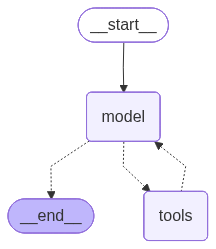

In [15]:
from langchain.agents import create_agent

system_prompt = """
You are a travel planner assistant. User asks travel queries like
'plan my trip to X', 'what to do in Y hotel', etc.
Always use the available web search tools (TavilySearch, GoogleSerperSearch)
to look up latest real-world travel info. Provide a helpful and clear itinerary/answers.
"""

agent = create_agent(
    model=model,
    tools=[tavily_search_tool , google_serper_search_tool],
    system_prompt=system_prompt.strip()
)

print("Travel planner agent ready!")
agent

In [16]:
response = agent.invoke({
    "messages": [
        {"role": "user", "content": "Give me a 3 day plan for Kasol travel with places to see."}
    ]
})

print("Agent answer:\n")
print(response)

Agent answer:

{'messages': [HumanMessage(content='Give me a 3 day plan for Kasol travel with places to see.', additional_kwargs={}, response_metadata={}, id='ae486c86-d4c0-40d1-9f8c-07e20a96b411'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '006svzxgn', 'function': {'arguments': '{"query":"Kasol travel plan 3 days"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'bjvx2ej84', 'function': {'arguments': '{"query":"places to visit in Kasol"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 391, 'total_tokens': 437, 'completion_time': 0.092135173, 'completion_tokens_details': None, 'prompt_time': 0.034582837, 'prompt_tokens_details': None, 'queue_time': 0.080735496, 'total_time': 0.12671801}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_bebe2dd4fb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': '

In [17]:
response["messages"]

[HumanMessage(content='Give me a 3 day plan for Kasol travel with places to see.', additional_kwargs={}, response_metadata={}, id='ae486c86-d4c0-40d1-9f8c-07e20a96b411'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '006svzxgn', 'function': {'arguments': '{"query":"Kasol travel plan 3 days"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'bjvx2ej84', 'function': {'arguments': '{"query":"places to visit in Kasol"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 391, 'total_tokens': 437, 'completion_time': 0.092135173, 'completion_tokens_details': None, 'prompt_time': 0.034582837, 'prompt_tokens_details': None, 'queue_time': 0.080735496, 'total_time': 0.12671801}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_bebe2dd4fb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c838

less safe

In [19]:
final_answer = response["messages"][-1].content
print(final_answer)

Here's a 3-day travel plan for Kasol:

Day 1: 
- Arrive at Bhuntar and take a bus or taxi to Kasol.
- Check into your hotel or campsite.
- Visit the Kasol market and explore the nearby cafes.
- In the evening, enjoy the bonfire and music at your campsite.

Day 2: 
- Start the day with a trek to Kheerganga, which is 12 km away from Kasol.
- The trek takes around 7-8 hours to reach the top, where you can enjoy the scenic views and peaceful atmosphere.
- Return to Kasol in the evening and explore the local market.

Day 3: 
- Visit the nearby villages like Chalal, Kalga, and Pulga.
- Explore the Parvati Valley and enjoy the scenic views of the surrounding mountains.
- Visit the Gurudwara Shri Manikaran Sahib and take a dip in the hot springs.
- Return to Kasol in the evening and enjoy the nightlife.

This plan provides a mix of adventure, nature, and culture, and is a great way to experience the best of Kasol in 3 days.


more safe

In [20]:
from langchain_core.messages import AIMessage

def get_final_answer(agent_response):
    for message in reversed(agent_response["messages"]):
        if isinstance(message, AIMessage) and message.content:
            return message.content

final_answer = get_final_answer(response)
print(final_answer)

Here's a 3-day travel plan for Kasol:

Day 1: 
- Arrive at Bhuntar and take a bus or taxi to Kasol.
- Check into your hotel or campsite.
- Visit the Kasol market and explore the nearby cafes.
- In the evening, enjoy the bonfire and music at your campsite.

Day 2: 
- Start the day with a trek to Kheerganga, which is 12 km away from Kasol.
- The trek takes around 7-8 hours to reach the top, where you can enjoy the scenic views and peaceful atmosphere.
- Return to Kasol in the evening and explore the local market.

Day 3: 
- Visit the nearby villages like Chalal, Kalga, and Pulga.
- Explore the Parvati Valley and enjoy the scenic views of the surrounding mountains.
- Visit the Gurudwara Shri Manikaran Sahib and take a dip in the hot springs.
- Return to Kasol in the evening and enjoy the nightlife.

This plan provides a mix of adventure, nature, and culture, and is a great way to experience the best of Kasol in 3 days.
